<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Nisha_Thakur_Day_2_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
df = pd.read_csv('housing.csv')

In [138]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Data Preprocessing


In [139]:
df.shape

(20640, 10)

Aim : To predict median house values in Californian districts, given a number of features from these districts

The dataset conist of 20640 rows and 10 columns, but to know more in details about the dataset. here are the below steps

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [141]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The datatypes of the housing csv are described here, we have ocean proximity which is in object. and all other seems to be in float values. There are no null values in the dataset but there are in total_bedrooms

In [142]:
df.duplicated().sum()

0

There are no duplicates in the dataset.

In [143]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There are 207 Null values in the Total_bedrooms columns in the dataset , which has to be replaced by mean of the column

In [144]:
import numpy as np
df['total_bedrooms'].fillna(np.round(df['total_bedrooms'].mean (),1), inplace=True)

In [145]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


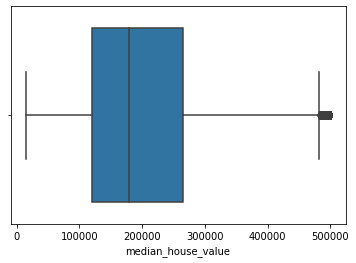

In [146]:
import seaborn as sns
sns.boxplot(df['median_house_value'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

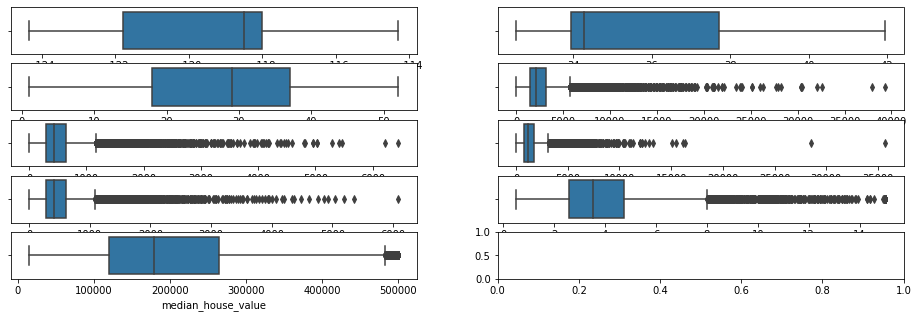

In [147]:
plt.figure(figsize=(16,5))
plt.subplot(5,2,1)
plt1=sns.boxplot(df['longitude'])
plt.subplot(5,2,2)
plt1=sns.boxplot(df['latitude'])
plt.subplot(5,2,3)
plt1=sns.boxplot(df['housing_median_age'])
plt.subplot(5,2,4)
plt1=sns.boxplot(df['total_rooms'])
plt.subplot(5,2,5)
plt1=sns.boxplot(df['total_bedrooms'])
plt.subplot(5,2,6)
plt1=sns.boxplot(df['population'])
plt.subplot(5,2,7)
plt1=sns.boxplot(df['households'])
plt.subplot(5,2,8)
plt1=sns.boxplot(df['median_income'])
plt.subplot(5,2,9)
plt1=sns.boxplot(df['median_house_value'])
plt.subplot(5,2,10)

The box whisker plots are used to understand the ouliners, skewness , Max and Min value of data and median in the data. 

Here we need to understand 5 things about the dataset i,e
- Minimum (0.4)
- First Quartile or 25% (13L)
- Median (Second Quartile) or 50%(17L)
- Third Quartile or 75% (26L)
- Maximum (48L)

In [148]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Data Visualisation

In [149]:
import matplotlib.pyplot as plt

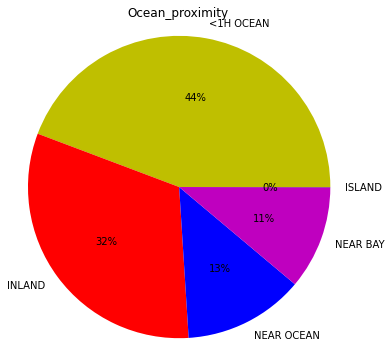

In [150]:

fig, ax = plt.subplots(figsize=(6,6))
data=df['ocean_proximity'].value_counts(normalize=True) *100

plt.label='<1H OCEAN','INLAND','NEAR OCEAN','NEAR BAY','ISLAND'
col = ['y','r','b','m','g']
plt.pie(data,colors = col,labels=plt.label,autopct='%1.0f%%')
#autopct gives number on pie chart with rounded value of 0
plt.title('Ocean_proximity')
plt.axis('equal')
plt.show()

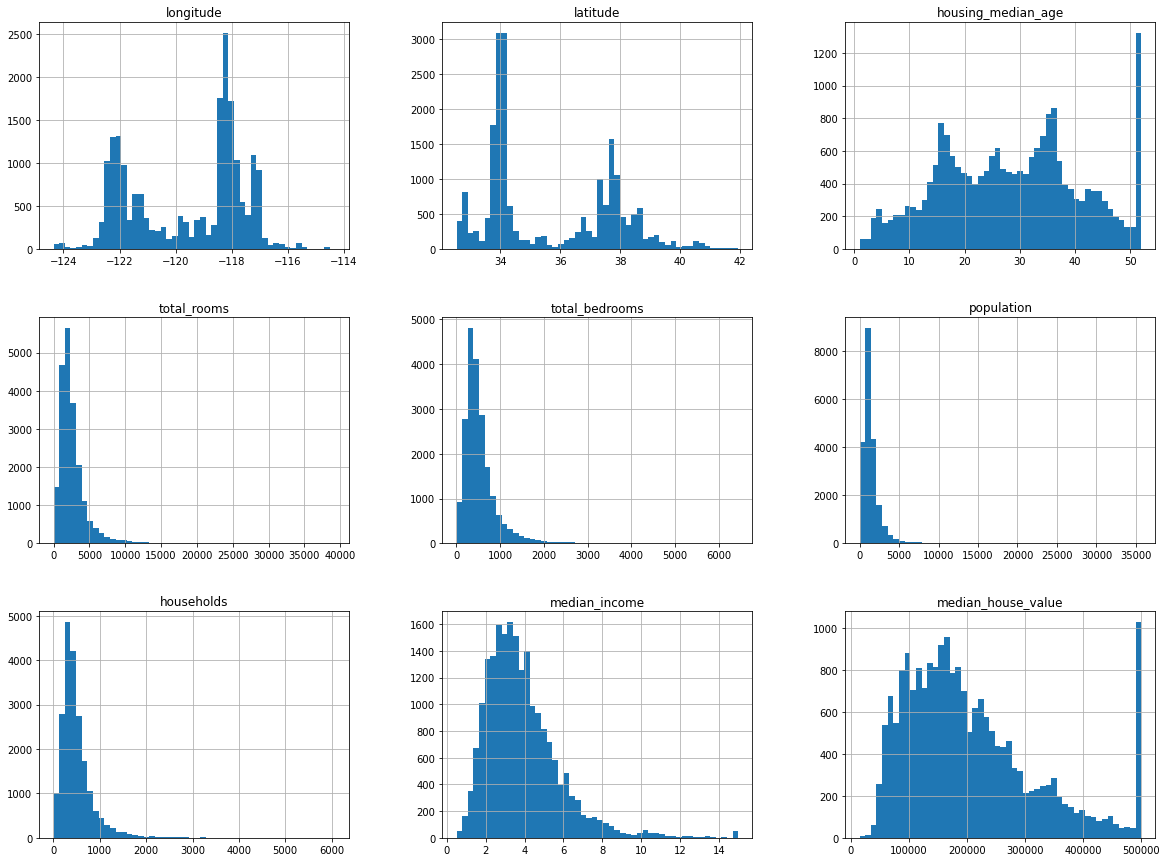

In [151]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

Statistical Testing

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

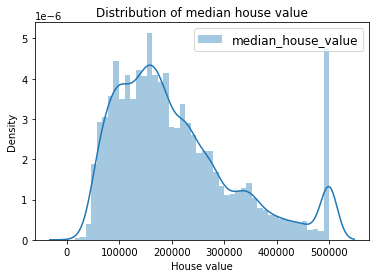

In [152]:
import seaborn as sns

sns.distplot(df['median_house_value'], label='median_house_value')

plt.legend(prop={'size':12})
plt.title('Distribution of median house value')
plt.xlabel('House value')
plt.ylabel('Density')

Hypothesis  =  Median_House_Value comes from a normal distribution

In [153]:

import scipy.stats as stats
stats.normaltest(df['median_house_value'])

NormaltestResult(statistic=2430.931051066072, pvalue=0.0)

Since the p value is <0.05 then it is said to be nor significant and not normally distributed. so we will reject the null hypothesis and here we will perform non parametric test i.e Wilcoxon , Man Whitney, Kruskal walis, Friedman test

In [154]:
#chi square test
from scipy.stats import chi2_contingency
#create a contingency table

contingency_table = pd.crosstab(df['median_house_value'], df['longitude'])
c, p, dof, expected = chi2_contingency(contingency_table)
print('chi square statistic: ', c)
print('pvalue: ' ,p)
print('degree of freedom: ', dof)
print('expected values: ', expected)

chi square statistic:  3026932.4904255774
pvalue:  1.0
degree of freedom:  3237963
expected values:  [[1.93798450e-04 3.87596899e-04 1.93798450e-04 ... 1.93798450e-04
  1.93798450e-04 1.93798450e-04]
 [4.84496124e-05 9.68992248e-05 4.84496124e-05 ... 4.84496124e-05
  4.84496124e-05 4.84496124e-05]
 [1.93798450e-04 3.87596899e-04 1.93798450e-04 ... 1.93798450e-04
  1.93798450e-04 1.93798450e-04]
 ...
 [4.84496124e-05 9.68992248e-05 4.84496124e-05 ... 4.84496124e-05
  4.84496124e-05 4.84496124e-05]
 [1.30813953e-03 2.61627907e-03 1.30813953e-03 ... 1.30813953e-03
  1.30813953e-03 1.30813953e-03]
 [4.67538760e-02 9.35077519e-02 4.67538760e-02 ... 4.67538760e-02
  4.67538760e-02 4.67538760e-02]]


Hypothesis is that median house value and longitude are independent, as p value is 1.0. so there is no relationship between the variable (can not reject null hypothesis)

In [155]:
#chi square test
from scipy.stats import chi2_contingency
#create a contingency table

contingency_table = pd.crosstab(df['median_house_value'], df['median_income'])
c, p, dof, expected = chi2_contingency(contingency_table)
print('chi square statistic: ', c)
print('pvalue: ' ,p)
print('degree of freedom: ', dof)
print('expected values: ', expected)

chi square statistic:  53276770.92236957
pvalue:  0.0
degree of freedom:  49652607
expected values:  [[2.32558140e-03 1.93798450e-03 1.93798450e-04 ... 1.93798450e-04
  3.87596899e-04 9.49612403e-03]
 [5.81395349e-04 4.84496124e-04 4.84496124e-05 ... 4.84496124e-05
  9.68992248e-05 2.37403101e-03]
 [2.32558140e-03 1.93798450e-03 1.93798450e-04 ... 1.93798450e-04
  3.87596899e-04 9.49612403e-03]
 ...
 [5.81395349e-04 4.84496124e-04 4.84496124e-05 ... 4.84496124e-05
  9.68992248e-05 2.37403101e-03]
 [1.56976744e-02 1.30813953e-02 1.30813953e-03 ... 1.30813953e-03
  2.61627907e-03 6.40988372e-02]
 [5.61046512e-01 4.67538760e-01 4.67538760e-02 ... 4.67538760e-02
  9.35077519e-02 2.29093992e+00]]


as p values is <0.0, so null hypothesis is rejected and there is no statistical significance/difference between the variable

In [156]:
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

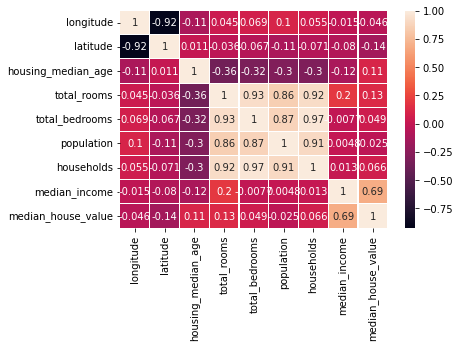

In [157]:
x = sns.heatmap(corr_matrix,linewidth=0.10,annot=True)
plt.show()

Model Development

In [158]:
df = df.replace({'<1H OCEAN':0,'INLAND':1,'NEAR OCEAN':2,'NEAR BAY':3,'ISLAND':4})

In [159]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [160]:
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
ocean_proximity       0.021732
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

As the variables above which are not correlated, i haved dropped them for preparing the model

In [161]:
df.drop(columns = ['households', 'total_bedrooms','ocean_proximity','population','longitude','latitude'], inplace=True)

In [162]:
df.head()

,housing_median_age,total_rooms,median_income,median_house_value
0,41.0,880.0,8.3252,452600.0
1,21.0,7099.0,8.3014,358500.0
2,52.0,1467.0,7.2574,352100.0
3,52.0,1274.0,5.6431,341300.0
4,52.0,1627.0,3.8462,342200.0


In [163]:
#Machine Learning Models
#Assigning the variables as depedent and independent

x = df[['housing_median_age', 'total_rooms', 'median_income']]
y = df['median_house_value']

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn
from sklearn import linear_model

#Splitting the dataset into the Training set and Test set
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=0)

In [165]:
model1 = linear_model.LinearRegression()
model1.fit(x_train1, y_train1)

LinearRegression()

In [166]:
y_pred1 = model1.predict(x_test1)

In [167]:
r1 = r2_score(y_test1, y_pred1)
print('The R2 of model1 is :',r1)

The R2 of model1 is : 0.48909768201874937


In [168]:
# Evaluation metrics

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test1, y_pred1)
mse = metrics.mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_test1,y_pred1) 
mape = metrics.mean_absolute_percentage_error(y_test1, y_pred1)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
print("MAPE:",mape)

Results of sklearn.metrics:
MAE: 60773.015147695056
MSE: 6661935821.356349
RMSE: 81620.68255875069
R-Squared: 0.48909768201874937
MAPE: 0.380928832001233


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'prediction')

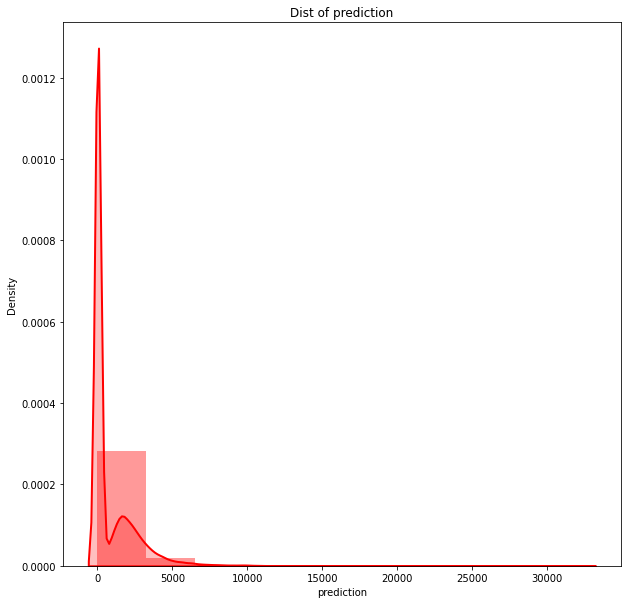

In [169]:
# Checking the distribution of prediction
import seaborn as sns
fig, ax = plt.subplots(1,1,figsize=(10, 10))
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(x_train1, hist = True, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="red", ax = ax,bins=10)
ax.title.set_text('Dist of prediction')
ax.set_xlabel('prediction')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'prediction')

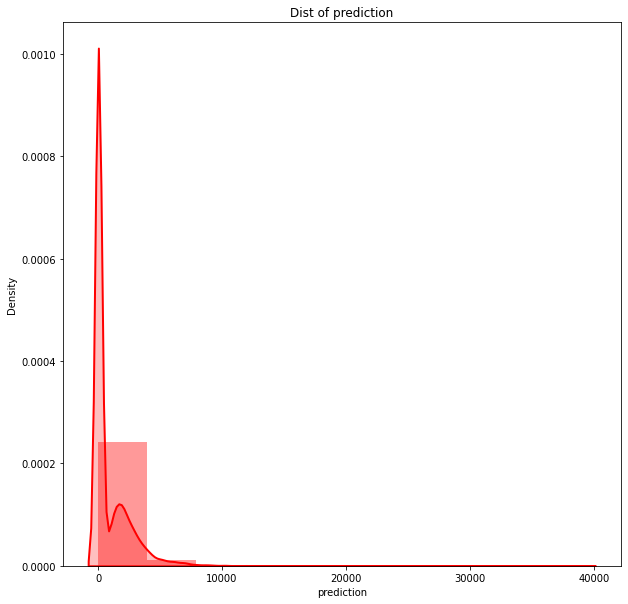

In [170]:
# Checking the distribution of prediction
import seaborn as sns
fig, ax = plt.subplots(1,1,figsize=(10, 10))
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(x_test1, hist = True, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="red", ax = ax,bins=10)
ax.title.set_text('Dist of prediction')
ax.set_xlabel('prediction')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'prediction')

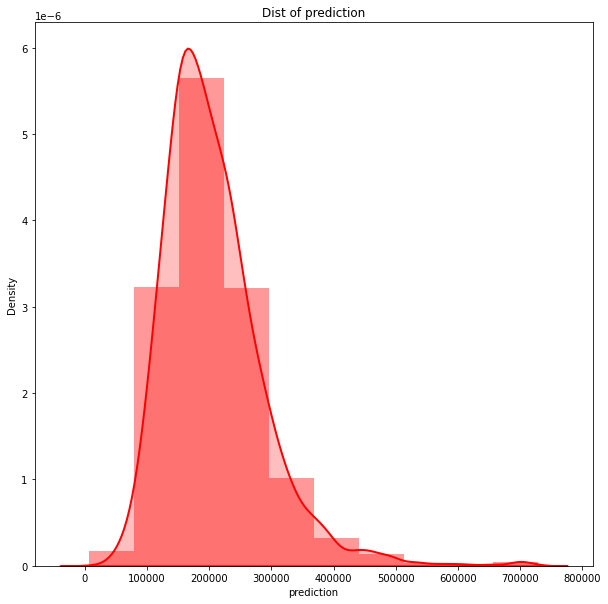

In [171]:
# Checking the distribution of prediction
import seaborn as sns
fig, ax = plt.subplots(1,1,figsize=(10, 10))
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(y_pred1, hist = True, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="red", ax = ax,bins=10)
ax.title.set_text('Dist of prediction')
ax.set_xlabel('prediction')

Decision Tree Regression

In [172]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train1, y_train1)

DecisionTreeRegressor(random_state=0)

In [173]:
y_pred1= regressor.predict(x_test1)

In [174]:
from sklearn.metrics import r2_score
r2_score(y_test1, y_pred1)

0.12316568402304573

Random Forest Regression and Hyper parameter tunning

In [175]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.arange(2,101)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.arange(2,31,2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.arange(2,51,2)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.arange(2,51,2)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, None], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50], 'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50], 'bootstrap': [True, False]}


In [129]:
# SKIP if you already have the hyperparameters
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_bestfit = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_bestfit.fit(x_train1, y_train1)

rf_bestfit.best_params_ # These are the parameters that we are setting to our model to get the best possible accuracy

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 60,
 'min_samples_split': 48,
 'min_samples_leaf': 26,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [130]:
# Run this, to avoid RandomizedSearch since we already have the parameters
from sklearn.ensemble import RandomForestRegressor
rf_bestfit = RandomForestRegressor(n_estimators= 43,
 min_samples_split= 48,
 min_samples_leaf= 18,
 max_features= 'sqrt',
 max_depth= 28,
 bootstrap= True,random_state=42)
rf_bestfit = rf_bestfit.fit(x_train1,y_train1)
prediction = rf_bestfit.predict(x_test1)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'prediction')

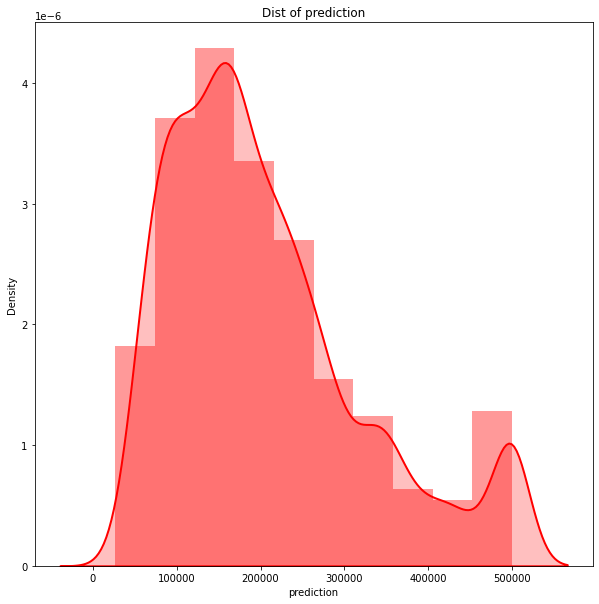

In [131]:
# Checking the distribution of prediction
import seaborn as sns
fig, ax = plt.subplots(1,1,figsize=(10, 10))
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(y_pred1, hist = True, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="red", ax = ax,bins=10)
ax.title.set_text('Dist of prediction')
ax.set_xlabel('prediction')

In [132]:
# score on Training data 
print(rf_bestfit.score(x_train1,y_train1))

0.6138886061352326


In [133]:
# score on Test data
print(rf_bestfit.score(x_test1,y_test1))

0.5306667217459098


In [134]:
# Prediction
prediction = rf_bestfit.predict(x_test1)

In [135]:
# Evaluation metrics

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test1, y_pred1)
mse = metrics.mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_test1,y_pred1) 
mape = metrics.mean_absolute_percentage_error(y_test1, y_pred1)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
print("MAPE:",mape)

Results of sklearn.metrics:
MAE: 78690.89849806202
MSE: 11433524048.35974
RMSE: 106927.65801400374
R-Squared: 0.12316568402304573
MAPE: 0.4780859400698607
